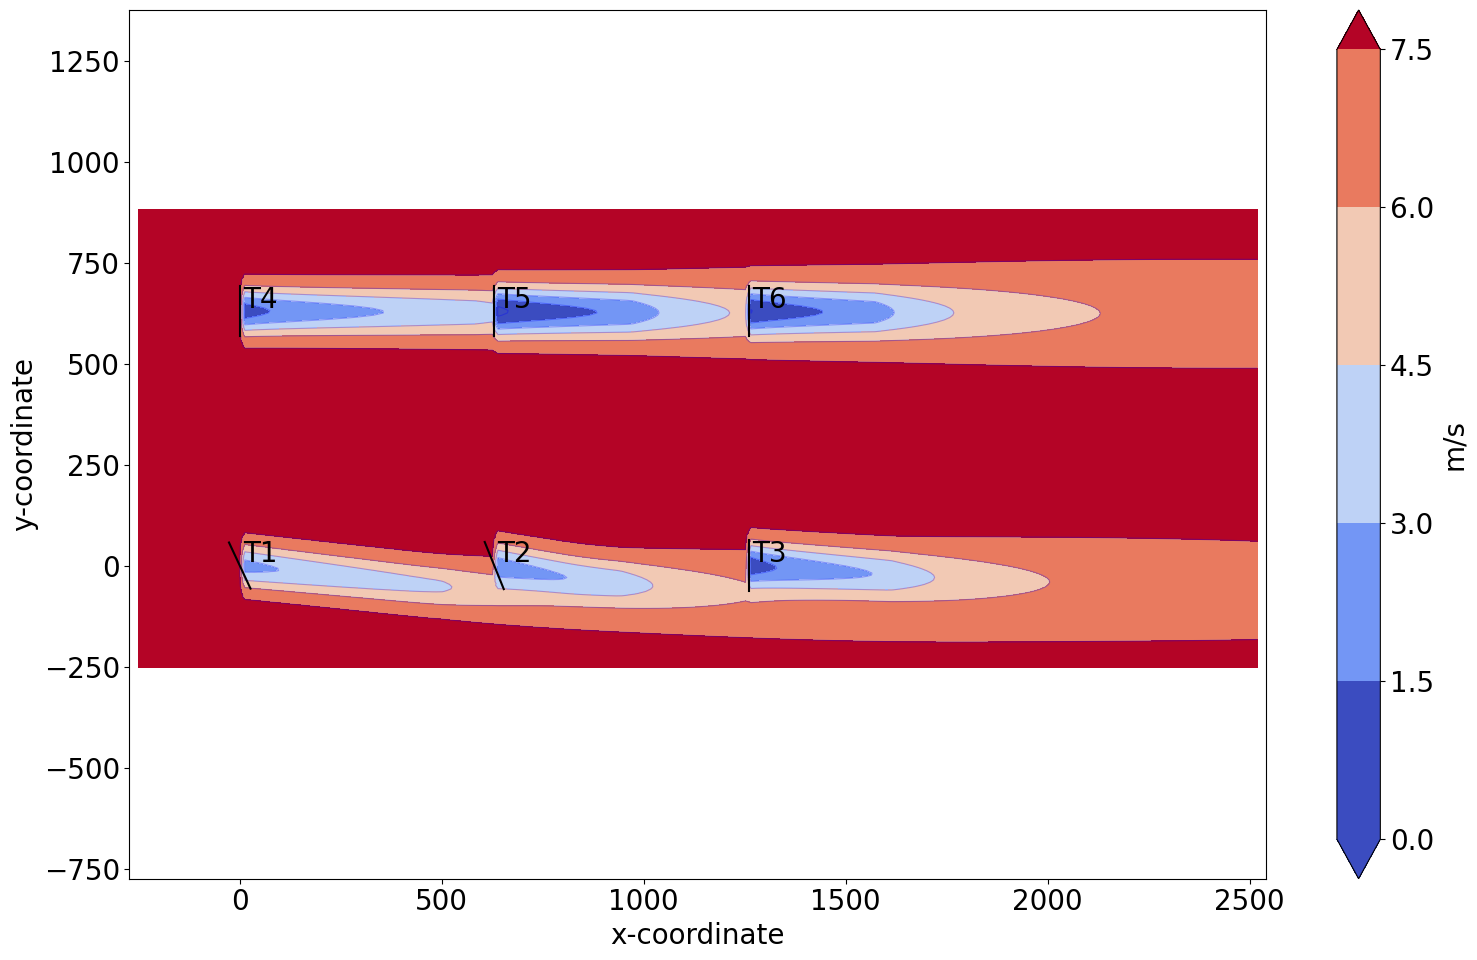

In [33]:
"""Example: Layout Visualizations

Demonstrate the use of all the functions within the layout_visualization module

"""
import matplotlib.pyplot as plt
import numpy as np

import floris.layout_visualization as layoutviz
from floris import FlorisModel
from floris.flow_visualization import visualize_cut_plane
plt.rcParams.update({'font.size': 20})

# Create the plotting objects using matplotlib
fig, ax = plt.subplots(1, 1, figsize=(16, 10), sharex=False)

MIN_WS = 1.0
MAX_WS = 8.0

# Initialize FLORIS with the given input file.
fmodel = FlorisModel("/home/ard/git/gmdp/configs/farm_example.yaml")

# Change to 5-turbine layout with a wind direction from northwest
fmodel.set(
     wind_directions=[270]
)

# Plot 2: Show turbine rotors on flow
fmodel.set(yaw_angles=np.array([[25., 22., 0, 0., 0., 0.]]))
horizontal_plane = fmodel.calculate_horizontal_plane(height=90.0)
visualize_cut_plane(horizontal_plane, ax=ax, min_speed=MIN_WS, max_speed=MAX_WS, color_bar=True, label_contours=False)
layoutviz.plot_turbine_rotors(fmodel, ax=ax, yaw_angles=np.array([[25., 22., 0, 0., 0., 0.]]))
turbine_names = ["T1", "T2", "T3", "T4", "T5", "T6"]
layoutviz.plot_turbine_labels(fmodel, ax=ax, turbine_names=turbine_names)
#ax.set_title("Flow visualization with yawed turbine")
ax.set_ylabel("y-coordinate")
ax.set_xlabel("x-coordinate")
ax.set_ylim(-300, 900)
plt.tight_layout()
plt.savefig("wind_farm_example.svg")

In [48]:
import numpy as np
fmodel.set(yaw_angles=np.array([[0., 0., 0., 25., 22., 0.]]))
#fmodel.set(yaw_angles=np.array([[25., 22., 0., 0., 0., 0.]]))

fmodel.run()
powers = fmodel.get_turbine_powers()
print(powers)
print(np.sum(powers[0, :2])/1000, np.sum(powers[0, 3:])/1000)

[[1753954.45917917  436442.70050139  507401.3275246  1458955.27507664
   779043.96579729 1042383.74961407]]
2190.3971596805595 3280.3829904879985


In [31]:
from floris.optimization.yaw_optimization.yaw_optimizer_sr import YawOptimizationSR
yaw_opt = YawOptimizationSR(fmodel)
df_opt = yaw_opt.optimize()
print("Optimization results:")
print(df_opt)

[Serial Refine] Processing pass=0, turbine_depth=0 (0.0%)
[Serial Refine] Processing pass=0, turbine_depth=1 (8.3%)
[Serial Refine] Processing pass=0, turbine_depth=2 (16.7%)
[Serial Refine] Processing pass=0, turbine_depth=3 (25.0%)
[Serial Refine] Processing pass=0, turbine_depth=4 (33.3%)
[Serial Refine] Processing pass=0, turbine_depth=5 (41.7%)
[Serial Refine] Processing pass=1, turbine_depth=0 (50.0%)
[Serial Refine] Processing pass=1, turbine_depth=1 (58.3%)
[Serial Refine] Processing pass=1, turbine_depth=2 (66.7%)
[Serial Refine] Processing pass=1, turbine_depth=3 (75.0%)
[Serial Refine] Processing pass=1, turbine_depth=4 (83.3%)
[Serial Refine] Processing pass=1, turbine_depth=5 (91.7%)
Optimization results:
   wind_direction  wind_speed  turbulence_intensity  \
0           270.0         8.0                  0.06   

                             yaw_angles_opt  farm_power_opt  \
0  [25.0, 22.65625, 0.0, 25.0, 21.875, 0.0]    6.580168e+06   

   farm_power_baseline  
0        